# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# creo el csv a tratar

In [2]:
import pandas as pd

non_malicious_data = pd.read_csv("DatosDeTraficoBueno.csv")
malicious_data = pd.read_csv("10vs1-1000sampling.csv")
non_malicious_data = non_malicious_data.sample(n=len(malicious_data), random_state=42)

# Limpieza de características

In [3]:
#Elimina datos
#columnas_a_eliminar = ['exaddr','engine_type','engine_id','dst_mask','src_mask', 'dst_mask','src_as','dst_as','#:unix_secs','unix_nsecs','sysuptime','first','last','nexthop']
columnas_a_eliminar = ['srcaddr','dstaddr','exaddr','engine_type','engine_id','dst_mask','src_mask', 'dst_mask','src_as','dst_as','#:unix_secs','unix_nsecs','sysuptime','first','last','nexthop']
malicious_data = malicious_data.drop(columnas_a_eliminar, axis=1)
non_malicious_data = non_malicious_data.drop(columnas_a_eliminar, axis=1)

In [4]:
malicious_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   dpkts      2493 non-null   int64
 1   doctets    2493 non-null   int64
 2   input      2493 non-null   int64
 3   output     2493 non-null   int64
 4   srcport    2493 non-null   int64
 5   dstport    2493 non-null   int64
 6   prot       2493 non-null   int64
 7   tos        2493 non-null   int64
 8   tcp_flags  2493 non-null   int64
dtypes: int64(9)
memory usage: 175.4 KB


In [5]:
non_malicious_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 398288 to 619856
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   dpkts      2493 non-null   int64
 1   doctets    2493 non-null   int64
 2   input      2493 non-null   int64
 3   output     2493 non-null   int64
 4   srcport    2493 non-null   int64
 5   dstport    2493 non-null   int64
 6   prot       2493 non-null   int64
 7   tos        2493 non-null   int64
 8   tcp_flags  2493 non-null   int64
dtypes: int64(9)
memory usage: 194.8 KB


# Clasificación


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [7]:

# Agregar una columna de etiquetas a cada conjunto de datos
malicious_data['etiqueta'] = 1
non_malicious_data['etiqueta'] = 0
# Combinar los conjuntos de datos y mezclarlos aleatoriamente
datos = pd.concat([malicious_data, non_malicious_data]).sample(frac=1, random_state=2)

X = datos.drop('etiqueta', axis=1)
y = datos['etiqueta']
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

from sklearn.preprocessing import MinMaxScaler
# Inicializa el escalador
scaler = MinMaxScaler()

# Ajusta el escalador a los datos de entrenamiento y luego transforma los datos de entrenamiento
X_train = scaler.fit_transform(X_train)

# Usa el escalador ajustado para transformar los datos de prueba
X_test = scaler.transform(X_test)



In [8]:

def evaluate_classification_model(y_true, y_pred):
    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_true, y_pred)
    print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))
    
    # Recall
    recall = recall_score(y_true, y_pred)
    print('Recall: {:.2f}%'.format(recall * 100))
    
    # Precisión
    precision = precision_score(y_true, y_pred)
    print('Precisión: {:.2f}%'.format(precision * 100))
    
    # F1 Score
    f1 = f1_score(y_true, y_pred)
    print('F1 Score: {:.2f}%'.format(f1 * 100))

    # Imprimir matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])
    
    # Dibujar la matriz de confusión
    fig, ax = plt.subplots(figsize=(5, 5))
    cmd.plot(ax=ax, cmap=plt.cm.Blues)
    plt.show()

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Función para evaluar el modelo sin CV
def evaluate_classification_model_no_cv(model, X_test, y_test):
    # Realizar predicciones con el modelo
    y_pred = model.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print('Precisión del modelo sin CV: {:.2f}%'.format(accuracy * 100))
    
    # Recall
    recall = recall_score(y_test, y_pred)
    print('Recall sin CV: {:.2f}%'.format(recall * 100))
    
    # Precisión
    precision = precision_score(y_test, y_pred)
    print('Precisión sin CV: {:.2f}%'.format(precision * 100))
    
    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print('F1 Score sin CV: {:.2f}%'.format(f1 * 100))

    # Imprimir matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])
    
    # Dibujar la matriz de confusión
    fig, ax = plt.subplots(figsize=(5, 5))
    cmd.plot(ax=ax, cmap=plt.cm.Blues)
    plt.show()

# Función para evaluar el modelo con CV
def evaluate_classification_model_with_cv(model, X, y, cv=5):
    # Realiza la validación cruzada y obtén las predicciones
    y_pred = cross_val_predict(model, X, y, cv=cv)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y, y_pred)
    print('Precisión del modelo con CV: {:.2f}%'.format(accuracy * 100))
    
    # Recall
    recall = recall_score(y, y_pred)
    print('Recall con CV: {:.2f}%'.format(recall * 100))
    
    # Precisión
    precision = precision_score(y, y_pred)
    print('Precisión con CV: {:.2f}%'.format(precision * 100))
    
    # F1 Score
    f1 = f1_score(y, y_pred)
    print('F1 Score con CV: {:.2f}%'.format(f1 * 100))

    # Imprimir matriz de confusión
    cm = confusion_matrix(y, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])
    
    # Dibujar la matriz de confusión
    fig, ax = plt.subplots(figsize=(5, 5))
    cmd.plot(ax=ax, cmap=plt.cm.Blues)
    plt.show()



# KNeighbors

Precisión del modelo sin CV: 95.79%
Recall sin CV: 96.48%
Precisión sin CV: 95.36%
F1 Score sin CV: 95.91%


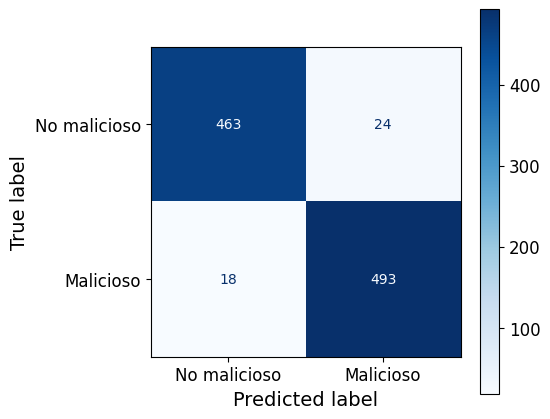

Precisión del modelo con CV: 93.12%
Recall con CV: 94.95%
Precisión con CV: 91.60%
F1 Score con CV: 93.24%


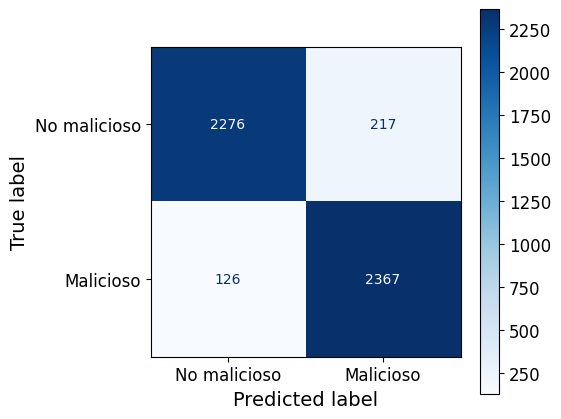

In [10]:
model = KNeighborsClassifier()

# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)


# LogisticRegression

Precisión del modelo sin CV: 86.67%
Recall sin CV: 78.28%
Precisión sin CV: 94.79%
F1 Score sin CV: 85.74%


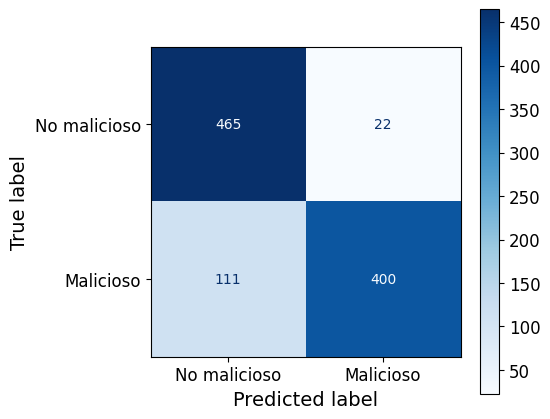

Precisión del modelo con CV: 100.00%
Recall con CV: 100.00%
Precisión con CV: 100.00%
F1 Score con CV: 100.00%


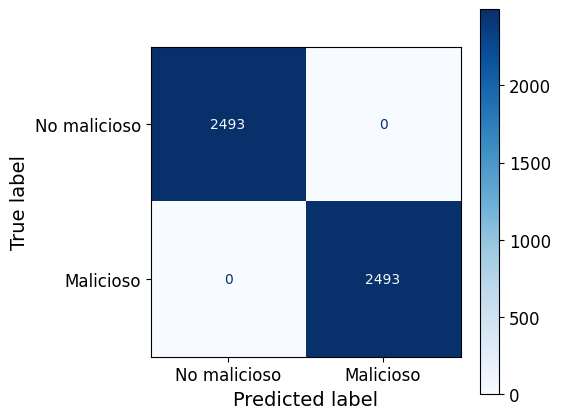

In [11]:
model = LogisticRegression(max_iter=1000)
# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)

# LinearSVC

Precisión del modelo sin CV: 86.77%
Recall sin CV: 78.47%
Precisión sin CV: 94.80%
F1 Score sin CV: 85.87%


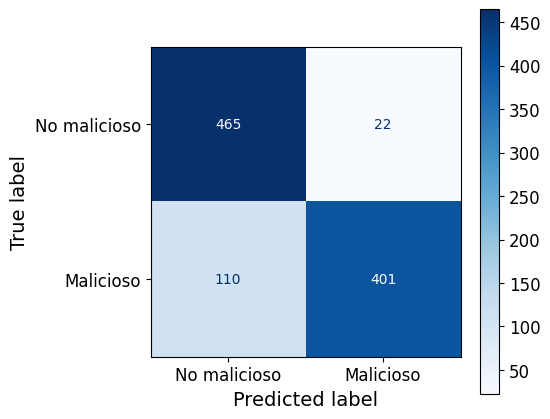

C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Precisión del modelo con CV: 88.15%
Recall con CV: 89.49%
Precisión con CV: 87.15%
F1 Score con CV: 88.30%


C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


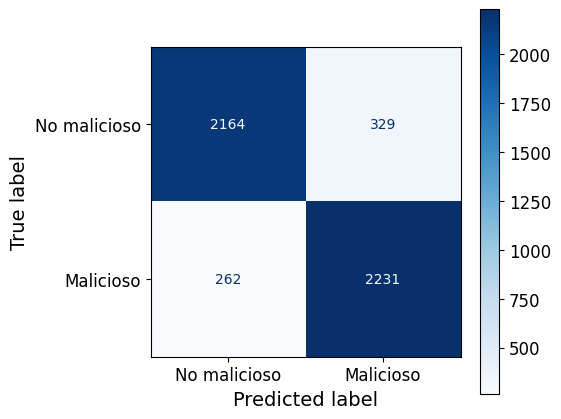

In [12]:

model = LinearSVC(max_iter=1000)
# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)

# Perceptron

Precisión del modelo sin CV: 67.03%
Recall sin CV: 99.80%
Precisión sin CV: 60.86%
F1 Score sin CV: 75.61%


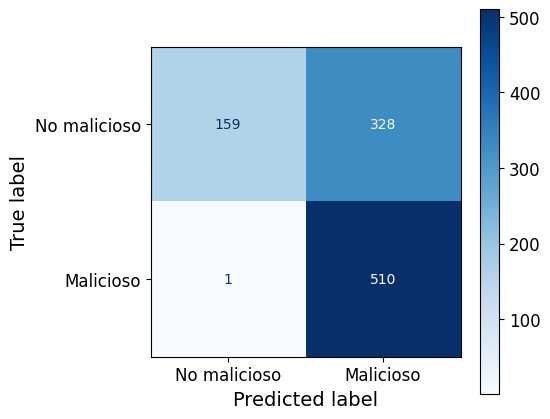

Precisión del modelo con CV: 83.17%
Recall con CV: 92.02%
Precisión con CV: 78.19%
F1 Score con CV: 84.54%


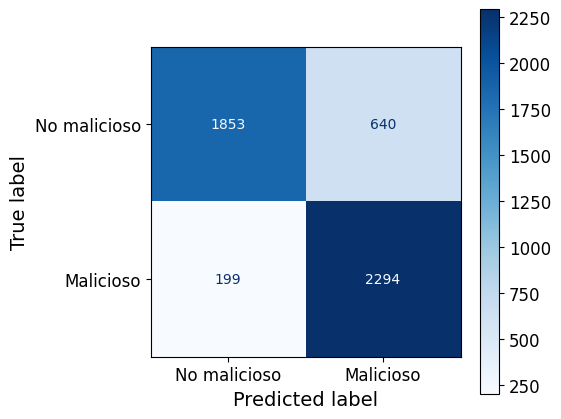

In [13]:
import matplotlib.pyplot as plt

model = Perceptron(random_state=42)
# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)

# RandomForestClassifier

Precisión del modelo: 100.00%
Recall: 100.00%
Precisión: 100.00%
F1 Score: 100.00%


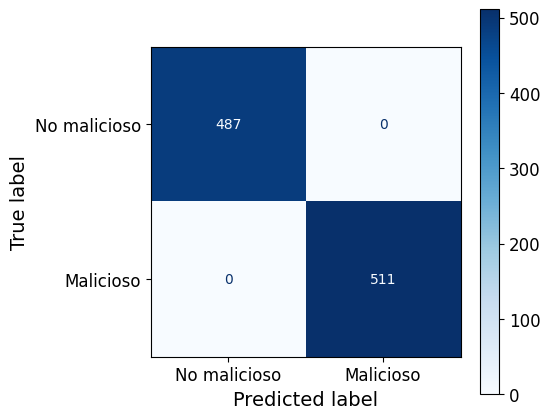

In [14]:
model = RandomForestClassifier()
# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Se hacen predicciones con los datos de prueba
predictions = model.predict(X_test)

evaluate_classification_model(y_test, predictions)

# Decision tree

Precisión del modelo sin CV: 100.00%
Recall sin CV: 100.00%
Precisión sin CV: 100.00%
F1 Score sin CV: 100.00%


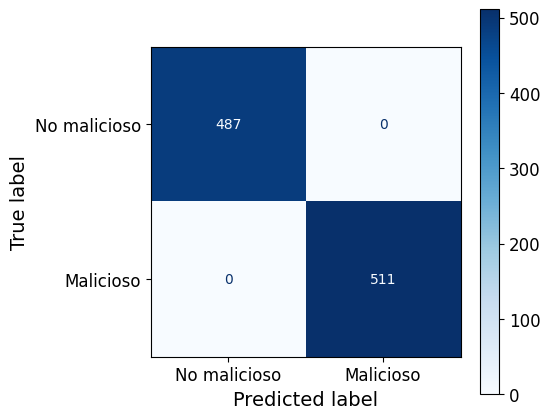

Precisión del modelo con CV: 100.00%
Recall con CV: 100.00%
Precisión con CV: 100.00%
F1 Score con CV: 100.00%


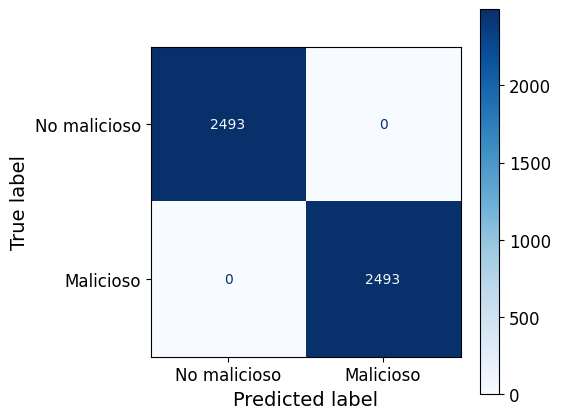

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)



# AdaBoost

Precisión del modelo sin CV: 100.00%
Recall sin CV: 100.00%
Precisión sin CV: 100.00%
F1 Score sin CV: 100.00%


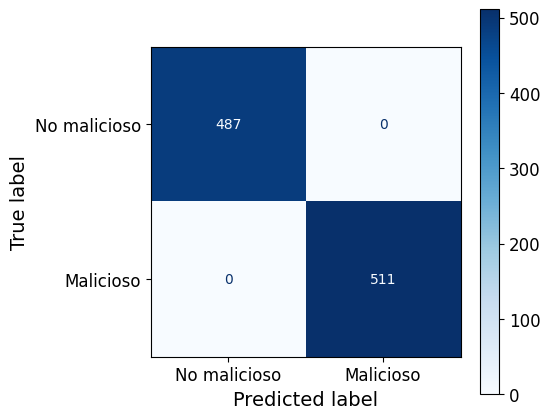

Precisión del modelo con CV: 100.00%
Recall con CV: 100.00%
Precisión con CV: 100.00%
F1 Score con CV: 100.00%


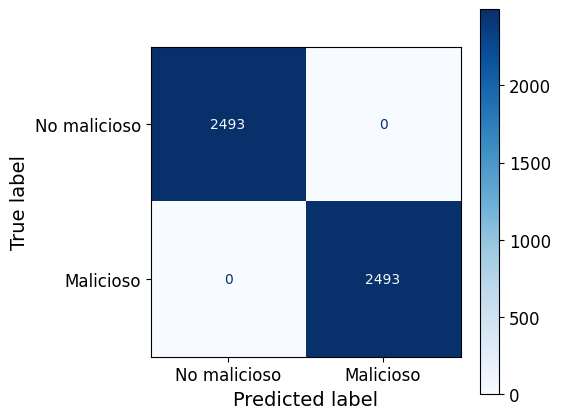

In [16]:
from sklearn.ensemble import AdaBoostClassifier

# Crear el modelo Adaboost
model = AdaBoostClassifier()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)


# xgboost

Precisión del modelo sin CV: 100.00%
Recall sin CV: 100.00%
Precisión sin CV: 100.00%
F1 Score sin CV: 100.00%


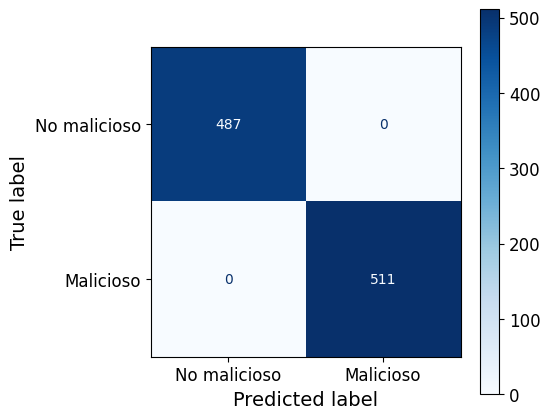

Precisión del modelo con CV: 100.00%
Recall con CV: 100.00%
Precisión con CV: 100.00%
F1 Score con CV: 100.00%


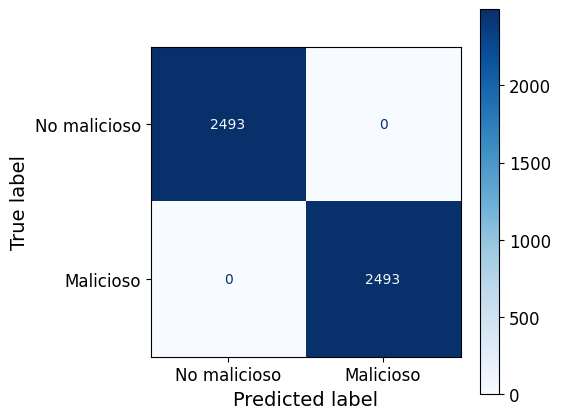

In [17]:
import xgboost as xgb

# Crear el modelo XGBoost
model = xgb.XGBClassifier()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)


# naive bayes

Precisión del modelo sin CV: 81.36%
Recall sin CV: 99.80%
Precisión sin CV: 73.38%
F1 Score sin CV: 84.58%


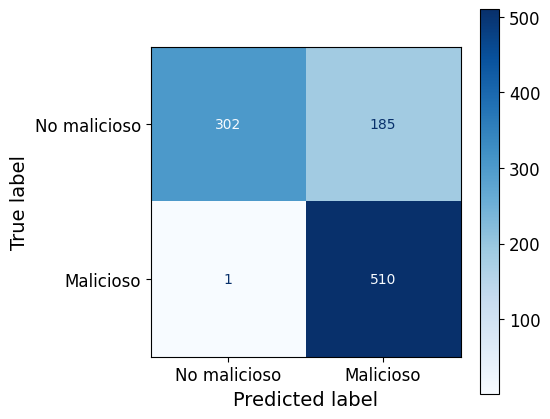

Precisión del modelo con CV: 80.55%
Recall con CV: 99.80%
Precisión con CV: 72.05%
F1 Score con CV: 83.69%


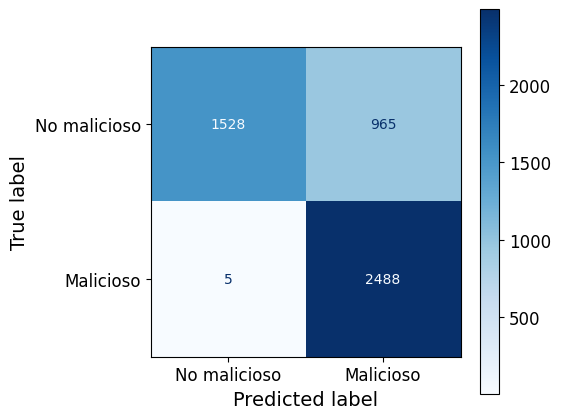

In [18]:

from sklearn.naive_bayes import GaussianNB

# Crear el modelo de clasificador Naive Bayes
model = GaussianNB()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación sin CV
evaluate_classification_model_no_cv(model, X_test, y_test)

# Evaluación con CV

evaluate_classification_model_with_cv(model, X, y, cv=5)

# Ensemble Classifier con votación mayoritaria para mejorar la precisión

In [19]:
from sklearn.ensemble import VotingClassifier
# Crear el ensemble classifier con votación mayoritaria
ensemble_model = VotingClassifier(estimators=[('lr', best_model2), ('perceptron', best_model4), ('lsvc', best_model3), ('rf', best_model5), ('knn', best_model1)], voting='hard')

# Entrenar el ensemble classifier
ensemble_model.fit(X_train, y_train)

# Hacer predicciones con el ensemble classifier
predictions = ensemble_model.predict(X_test)

# Evaluar el rendimiento del ensemble classifier
accuracy = accuracy_score(y_test, predictions)
print('Precisión del ensemble classifier: {:.2f}%'.format(accuracy * 100))

NameError: name 'best_model2' is not defined